# Volume 1: K-Means Clustering.
    Maxwell Nielsen
    Section 001
    10/15/2021

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [3]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol            #we initialize our parameters
        self.p = p
        self.normalize = normalize
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        cluster_centers = []       #this will be our list of cluster centers
        
        num_rows = X.shape[0]
        
        for i in range(self.n_clusters):
            cluster_centers.append(X[random.randint(0, num_rows-1)])      #we initialize our list of cluster centers with random rows of X
        
        data_points_for_each_centroid_dic = {}           #this is our dictionary of data corresponding to each centroid
        
        for i in range(self.n_clusters):
            data_points_for_each_centroid_dic[i] = []
        
        for i in range(self.max_iter):
            for i in range(self.n_clusters):
                data_points_for_each_centroid_dic[i] = []
            for i in range(num_rows):
                distances_to_each_centroid = []
                for j in range(len(cluster_centers)):
                    distances_to_each_centroid.append(np.linalg.norm(X[i]-cluster_centers[j]))
            
                closest_centroid = distances_to_each_centroid.index(min(distances_to_each_centroid))
            
                data_points_for_each_centroid_dic[closest_centroid].append(X[i])    #if the row of X is closest to a centroid, we add it to that index of our dictionary
            
            centers_copy = cluster_centers.copy()
            
            
            for i in range(self.n_clusters):
                if len((data_points_for_each_centroid_dic[i])) == 0:
                       cluster_centers[i] = X[random.randint(0, num_rows-1)]
                       
                else:
                    cluster_centers[i] = np.average(data_points_for_each_centroid_dic[i], axis=0)
                  
            if all([np.linalg.norm(cluster_centers[i] - centers_copy[i]) < self.tol for i in range(self.n_clusters)]):    #if the distances between sucessive centroids are less than the tolerances then we terminate
                break
                
            if self.normalize == True:
                for i in range(self.n_clusters):
                    cluster_centers[i] = cluster_centers[i] / np.linalg.norm(cluster_centers[i])  #normalize cluster centers
                    
                    
        self.centers = cluster_centers
        self.assignments = data_points_for_each_centroid_dic     #define new attributes
        
        
        
        return self
        
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        l = X.shape[0]
        
        closest_to_index = [None] * l  #list of indices of closest centroid to each data point
        
        for i in range(l):
            closest_to_index[i] = 0
            for j in range(1, len(self.centers)):
                if np.linalg.norm(X[i] - self.centers[j], ord=self.p) < np.linalg.norm(X[i] - self.centers[closest_to_index[i]], ord=self.p):
                    closest_to_index[i] = j        #assign the index of the centroid closest to the data point
                    
        closest_to_values = []
        
        for i in range(l):
            closest_to_values.append(self.centers[closest_to_index[i]]) #now make a list of the associated centroids
                
        integer_array = np.array(closest_to_values)     #make this list into a numpy array
        
        return integer_array
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)      #call the predict method on the fit method of X
    
    def plot(self, new_lims = False, XMIN = 0., XMAX = 0., YMIN = 0., YMAX = 0.):
        "Will plot the cluster centers as black crosses. Will plot from the assignments dictionary the clusters by color."
        #list of colors and markers to iterate through
        colors = sns.color_palette(n_colors = self.n_clusters)
        markers = ['*','.','x','d','2','^','s','p','+']             #length 9
        
        #making the plot not so dang small
        plt.figure(figsize = (8,6))
        
        #iter will be used to iterate through the list of colors and markers
        iter = 0
        
        #plotting points by cluster and iterating through colors and markers
        #for each key in the assignments dictionary (which represents a cluster group):
        for key in self.assignments:
            
            #the length of a specific key in the assignments dictionary is the number of points associated with that cluster/key
            #so for all points associated with a cluster:
            for j in range(len(self.assignments[key])):
                
                #getting a single point in the cluster/key
                point = self.assignments[key][j]
                
                #plotting the x coord (point[0]) with its y coord (point[1])
                plt.plot(point[0],point[1], color = colors[iter], marker = markers[iter])
                
            #incrementing iter, careful not to go to/passed possible index of 9
            iter = (iter + 1) % 9
            
        #plotting centers with black cross
        #EXPLANATION: the i = 0 and incrementing i is for the sake of labeling the legend with "Means"; if I just do plotting
            #with label="Means", the legend gets multiple "Means" labels in there (one for each center point); therefore,
            #I'm starting an i=0 and doing the label only when i is 0 so that "Means" only shows up once in the legend
        i = 0
        for point in self.centers:
            if i == 0:
                plt.plot(point[0],point[1],'kP',markersize = 8, label = "Means")
            else:
                plt.plot(point[0],point[1],'kP',markersize = 8)
            i += 1
        plt.legend(loc = 'upper left')
        
        assgn = self.assignments
        #getting domain and range for plot -- Rounding down to nearest int for mins, up for maxes
        #first, list comprehension to get min/max out of all the points in all the keys
        x_min = min([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.floor rounds down to nearest integer 
        x_min = math.floor(x_min)
        
        x_max = max([assgn[key][index][0] for key in assgn for index in range(len(assgn[key]))])
        #math.ceil rounds up to nearest integer
        x_max = math.ceil(x_max)
        
        #etc.
        y_min = min([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_min = math.floor(y_min)
        y_max = max([assgn[key][index][1] for key in assgn for index in range(len(assgn[key]))])
        y_max = math.ceil(y_max)
        
        #new limits weren't set
        if not new_lims:
            #labeling and setting domain and range for plot
            plt.xlabel('First Principle Component')
            plt.ylabel('Second Principle Component')
            plt.xlim([x_min,x_max])
            print("xlim =",[x_min,x_max])
            plt.ylim([y_min,y_max])
            print("ylim =",[y_min,y_max])
            plt.show()

        #new limits are set
        else: 
            #labeling and setting domain and range for plot
            plt.xlabel('First Principle Component')
            plt.ylabel('Second Principle Component')
            plt.xlim([XMIN,XMAX])
            plt.ylim([YMIN,YMAX])
            plt.show()
            


In [4]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

In [5]:
k = KMeans(n_clusters = 3)       #split the data into 3 clusters
k.fit(iris_data)               

xlim = [-4, 4]
ylim = [-2, 2]


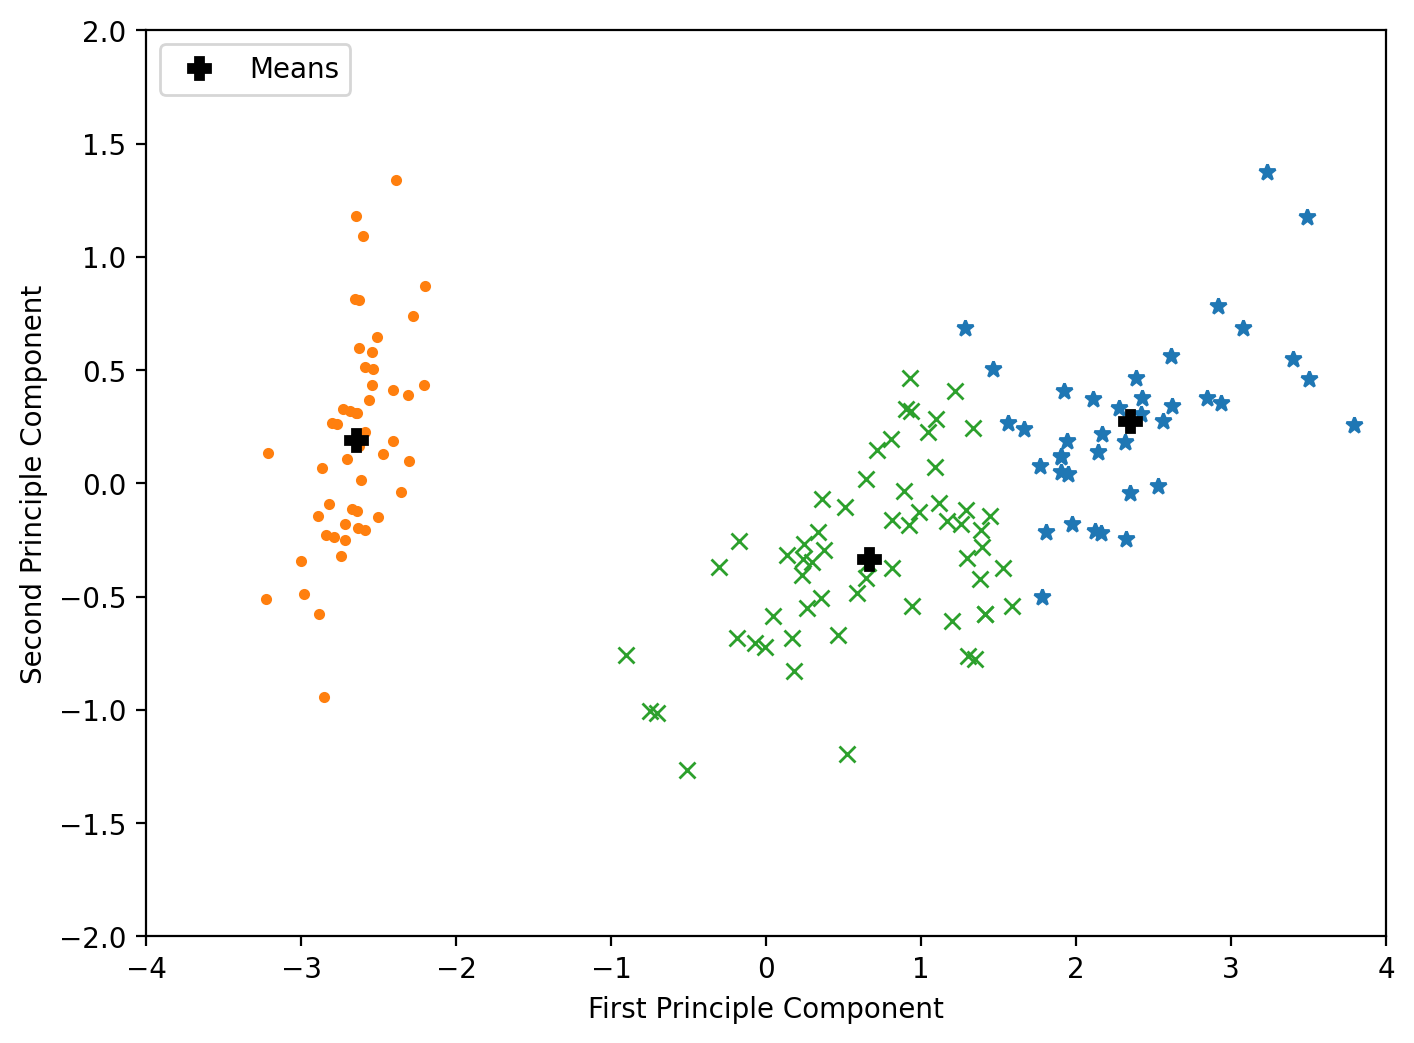

In [6]:
k.plot()       

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

In [7]:
sacramento_data = np.load('sacramento.npy')[:, -2:]     #only load the relevant data


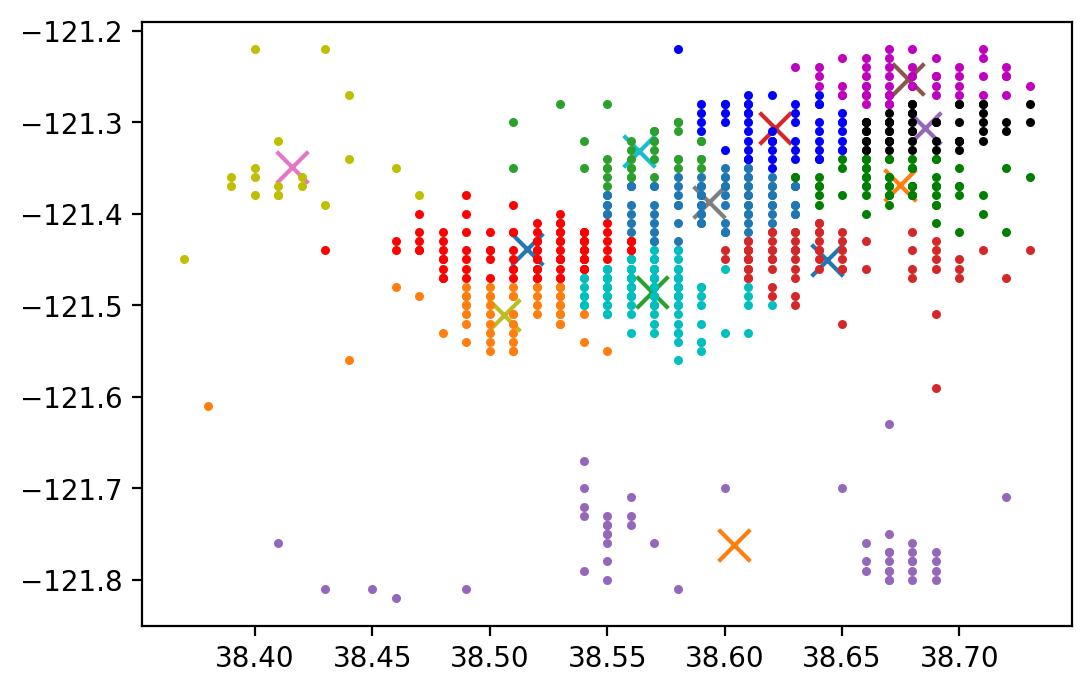

In [8]:
data = KMeans(n_clusters = 12, p = 7)      #make our model into a member of the KMeans class
data.fit(sacramento_data).predict(sacramento_data)     #run our methods on our data
colors = 10 * ['r', 'g', 'c', 'b', 'k', 'm', 'y', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown']
for cluster in data.centers:
    plt.scatter(cluster[0], cluster[1], s=130, marker='x')  #we plot our cluster centers
for i in range(len(data.assignments)):
    coordinates = data.assignments[i]
    x = [c[0] for c in coordinates]
    y = [c[1] for c in coordinates]
    plt.scatter(x, y, color=colors[i], s=5)   #make a scatter plot out of the two dimensions of our data

Give your explaination here

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

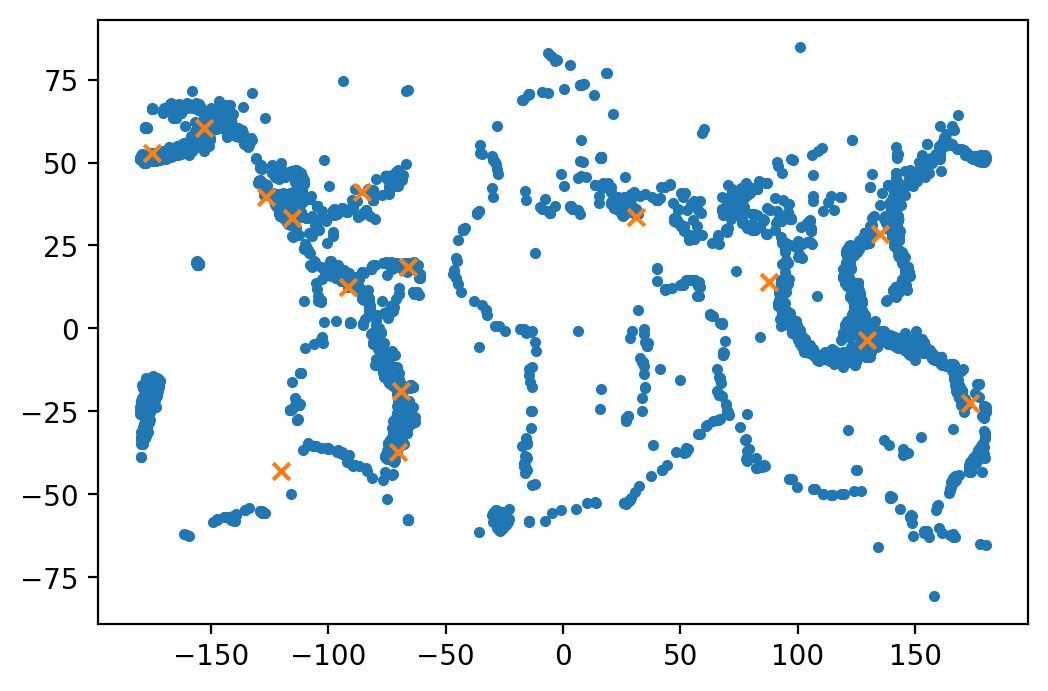

In [9]:
data = np.load('earthquake_coordinates.npy')

theta = [np.deg2rad(long) for long in data.transpose()[0]]    
phi = [np.deg2rad(90 - lat) for lat in data.transpose()[1]]

x = [np.sin(phi[i]) * np.cos(theta[i]) for i in range(len(theta))]    #we get each coordinate of our data by converting from spherical coordinates to euclidean 
y = [np.sin(theta[i]) * np.sin(phi[i]) for i in range(len(theta))]
z = [np.cos(phi[i]) for i in range(len(phi))]

euclidean_coordinates = np.array([[x[i], y[i], z[i]] for i in range(len(theta))])    #array of our euclidean coordinates

norms = KMeans(n_clusters = 15, normalize = True)             
norm_labels = norms.fit_predict(euclidean_coordinates)         #these are the the cluster centers associated with each euclidean data point

centers = np.array(norms.centers)

phi = [np.arccos(center) for center in centers.transpose()[2]]
theta = [np.arctan2(centers[i][1], centers[i][0]) for i in range(len(centers))]
long = [(180 * theta[i]) / np.pi for i in range(len(theta))]     #we convert into lattitude and longitude from spherical
lat = [90 - (180 * phi[i]) / np.pi for i in range(len(phi))]

plt.scatter(data.transpose()[0], data.transpose()[1], marker = '.')
plt.scatter(long, lat, marker = 'x')
plt.show()